In [18]:
import pandas as pd
pd.set_option("display.max_columns", None)

import matplotlib.pyplot as plt

Model Building

In [2]:
df = pd.read_csv("dataset/phase2_df.csv")

# Replace spaces with underscores in column names
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

df.head()

,Age,Gender,Education_Level,Joining_Designation,joining_date,joining_month,joining_year,ReportCount,Active,TBV_avg,QR_avg,Income_avg,Grade_avg,income_diff_pattern,tbv_diff_pattern,qr_diff_pattern,grade_diff_pattern,City_C1,City_C10,City_C11,City_C12,City_C13,City_C14,City_C15,City_C16,City_C17,City_C18,City_C19,City_C2,City_C20,City_C21,City_C22,City_C23,City_C24,City_C25,City_C26,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,0.189189,0.0,1.0,0.00,0.766667,1.000000,0.714286,0.086957,0.0,0.184600,0.333333,0.262508,0.00,0.0,0.000000,0.500000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.216216,0.0,0.0,0.00,0.000000,0.727273,0.857143,0.086957,0.0,0.057086,0.000000,0.200489,0.00,0.0,0.333333,0.500000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.232667,0.0,1.0,0.00,0.900000,0.363636,0.285714,0.956522,0.0,0.153949,0.086957,0.610567,0.75,0.0,0.333333,0.500000,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.243243,1.0,0.0,0.25,0.966667,0.909091,0.714286,0.043478,0.0,0.089047,0.000000,0.237608,0.25,0.0,0.333333,0.500000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.571429,0.0,1.0,0.00,0.066667,0.454545,0.714286,0.260870,0.0,0.082327,0.142857,0.227116,0.00,0.0,0.333333,0.333333,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(2381, 46)

In [4]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop(columns=['Active'])
y = df['Active'] # Fully-Paid: 1 and Charged-Off: 0
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [5]:
y_train.value_counts(), y_test.value_counts()

(Active
 0.0    1440
 1.0     702
 Name: count, dtype: int64,
 Active
 0.0    176
 1.0     63
 Name: count, dtype: int64)

* It doesn't seems to be a big data imbalance so using techniques like SMOTE or Weight Imbalance will have big impact.
* Also using such techniques may increase the chances of overfiting.

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:\n", report)

Accuracy: 0.91

Confusion Matrix:
[[166  10]
 [ 12  51]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       176
         1.0       0.84      0.81      0.82        63

    accuracy                           0.91       239
   macro avg       0.88      0.88      0.88       239
weighted avg       0.91      0.91      0.91       239



Let's use Class weights to balance the Dataset and check the results

In [7]:
# Specify class weights (class 0 is the minority class)
class_weights = {0: 1, 1: 2}

# Initialize RandomForestClassifier
clf = RandomForestClassifier(class_weight=class_weights, random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:\n", report)

Accuracy: 0.92

Confusion Matrix:
[[169   7]
 [ 12  51]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       176
         1.0       0.88      0.81      0.84        63

    accuracy                           0.92       239
   macro avg       0.91      0.88      0.89       239
weighted avg       0.92      0.92      0.92       239



* 1% increase in accuracy using Class Weights 

In [8]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# Check the distribution of classes after applying SMOTE
print("Class distribution before SMOTE:", {0: sum(y_train == 0), 1: sum(y_train == 1)})
print("Class distribution after SMOTE:", {0: sum(y_train_smote == 0), 1: sum(y_train_smote == 1)})

Class distribution before SMOTE: {0: 1440, 1: 702}
Class distribution after SMOTE: {0: 1440, 1: 1440}


In [9]:
# Initialize RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:\n", report)

Accuracy: 0.91

Confusion Matrix:
[[166  10]
 [ 12  51]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       176
         1.0       0.84      0.81      0.82        63

    accuracy                           0.91       239
   macro avg       0.88      0.88      0.88       239
weighted avg       0.91      0.91      0.91       239



* Not much change if we use SMOTE

Hyperparameter Tuning

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None] + list(range(25, 40, 1)),
    'min_samples_split': [5,10,20,25],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [False]
}

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(class_weight=class_weights, random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_clf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Make predictions on the test set using the best model
y_pred = random_search.best_estimator_.predict(X_test)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1']))

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Best Hyperparameters: {'bootstrap': False, 'max_depth': 39, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 157}

Confusion Matrix:
           Predicted 0  Predicted 1
Actual 0          167            9
Actual 1           11           52

Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.95      0.94       176
         1.0       0.85      0.83      0.84        63

    accuracy                           0.92       239
   macro avg       0.90      0.89      0.89       239
weighted avg       0.92      0.92      0.92       239



* Accuracy 91 : Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 68}
* Accuracy 91 : Best Hyperparameters: {'bootstrap': False, 'max_depth': 23, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 197}
* Accuracy 92 : Best Hyperparameters: {'bootstrap': False, 'max_depth': 26, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 112}
* Accuracy 92 : Best Hyperparameters: {'bootstrap': False, 'max_depth': 39, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 157}


Implementation of Boosting Algorithms

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

# Specify class weights (class 0 is the minority class)
class_weights = {0: 1, 1: 2}

# Initialize RandomForestClassifier
clf = GradientBoostingClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:\n", report)

Accuracy: 0.93

Confusion Matrix:
[[168   8]
 [  8  55]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       176
         1.0       0.87      0.87      0.87        63

    accuracy                           0.93       239
   macro avg       0.91      0.91      0.91       239
weighted avg       0.93      0.93      0.93       239



XGBoost

In [12]:
import xgboost as xgb

# Initialize XGBoost classifier
clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:\n", report)

Accuracy: 0.93

Confusion Matrix:
[[168   8]
 [  8  55]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       176
         1.0       0.87      0.87      0.87        63

    accuracy                           0.93       239
   macro avg       0.91      0.91      0.91       239
weighted avg       0.93      0.93      0.93       239



In [13]:
## Hyperparameter Tuning
# Define the parameter grid for XGBoost
param_dist = {
    'learning_rate': [0.008, 0.009, 0.01, 0.02],
    'n_estimators': [250, 260, 270, 280, 290],
    'max_depth': [6, 7, 8, 9],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_clf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Make predictions on the test set using the best model
y_pred = random_search.best_estimator_.predict(X_test)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1']))

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 280, 'max_depth': 6, 'learning_rate': 0.02, 'colsample_bytree': 1.0}

Confusion Matrix:
           Predicted 0  Predicted 1
Actual 0          168            8
Actual 1            8           55

Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       176
         1.0       0.87      0.87      0.87        63

    accuracy                           0.93       239
   macro avg       0.91      0.91      0.91       239
weighted avg       0.93      0.93      0.93       239



* Accuracy 92: Best Hyperparameters: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
* Accuracy 93: Best Hyperparameters: {'subsample': 0.9, 'n_estimators': 250, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
* Accuracy 93: Best Hyperparameters: {'subsample': 0.9, 'n_estimators': 250, 'max_depth': 8, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
* Accuracy 93: Best Hyperparameters: {'subsample': 0.9, 'n_estimators': 280, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.9}



In [14]:
import xgboost as xgb

# Initialize XGBoost classifier
clf = xgb.XGBClassifier(subsample= 0.9, n_estimators= 280, max_depth= 6, learning_rate= 0.01, colsample_bytree= 0.9, random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:\n", report)

Accuracy: 0.93

Confusion Matrix:
[[169   7]
 [ 10  53]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       176
         1.0       0.88      0.84      0.86        63

    accuracy                           0.93       239
   macro avg       0.91      0.90      0.91       239
weighted avg       0.93      0.93      0.93       239



LightGBM

In [15]:
import lightgbm as lgb

# Initialize LightGBM classifier
clf = lgb.LGBMClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:\n", report)

[LightGBM] [Info] Number of positive: 702, number of negative: 1440
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1022
[LightGBM] [Info] Number of data points in the train set: 2142, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.327731 -> initscore=-0.718465
[LightGBM] [Info] Start training from score -0.718465

Accuracy: 0.94

Confusion Matrix:
[[168   8]
 [  7  56]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       176
         1.0       0.88      0.89      0.88        63

    accuracy                           0.94       239
   macro avg       0.92      0.92      0.92       239
weighted avg       0.94      0.94      0.94       239



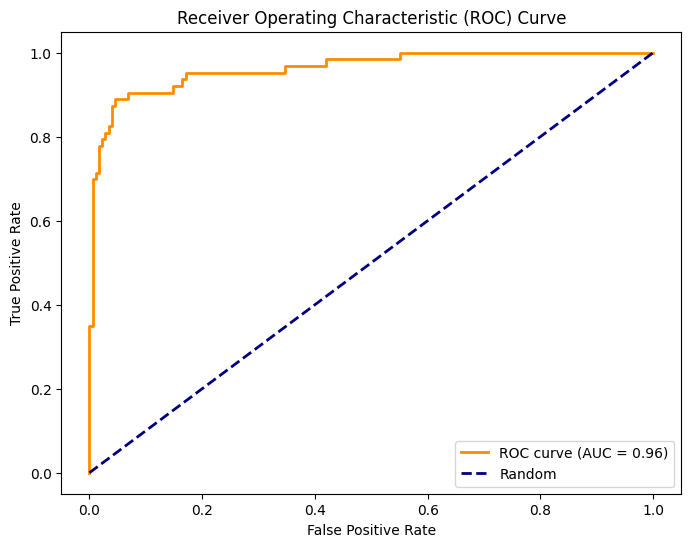

In [20]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (class 1)
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Feature Importance
* Since LightGBM is giving us the best accuracy, we'll be using the LightGBM trained model to extracct feature importance.

In [16]:
# Extract feature importance
feature_importance = clf.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)

                Feature  Importance
7           ReportCount         451
4          joining_date         404
0                   Age         391
10           Income_avg         339
5         joining_month         298
6          joining_year         233
8               TBV_avg         215
13     tbv_diff_pattern         120
9                QR_avg         117
14      qr_diff_pattern          67
2       Education_Level          55
1                Gender          49
3   Joining_Designation          44
35             City_C27          24
11            Grade_avg          24
37             City_C29          15
18             City_C11          13
40              City_C5          13
29             City_C21          11
24             City_C17          11
16              City_C1          11
34             City_C26          11
20             City_C13           9
26             City_C19           8
25             City_C18           8
36             City_C28           7
38              City_C3     

Results Interpretation & Stakeholder Presentation

Interpreting Model Coefficients: It seems that top features influencing the usecase output includes:
1. ReportCount: Number of time the Driver is reporting.
2. Joining Date: It looks interesting but Joining Date has good incluence on output.
3. Age: Driver's age across the Business has good influence on the output
4. Income_avg: What income the Driver is earning from the Business.
5. Joining_month: Interestingly joining month also has an impact on Driver's attrition.


Feedback Loop
* We should set up a periodic review process to assess the model's relevance and performance.
* Keep on generating more data and analyse the reports on what may impacting out Churing behaviour and handle the same with care and understanding.
* Recommend surveys or feedback mechanisms to collect data on new trends, driver concerns, and customer feedback to refine the model in the future.
* We should have some daily feedback calls form driver, understanding their problems and saving their respective sentiments.



Trade-Off Analysis and Recommendation is in Notebook Phase 2 